Loan Application Status Prediction
Project Description
This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 
Independent Variables:
1.	Loan_ID - This refer to the unique identifier of the applicant's affirmed purchases
2.	Gender - This refers to either of the two main categories (male and female) into which applicants are divided on the basis of their reproductive functions
3.	Married - This refers to applicant being in a state of matrimony
4.	Dependents - This refres to persons who depends on the applicants for survival
5.	Education - This refers to number of years in which applicant received systematic instruction, especially at a school or university
6.	Self_Employed - This refers to applicant working for oneself as a freelancer or the owner of a business rather than for an employer
7.	Applicant Income - This refers to disposable income available for the applicant's use under State law.
8.	CoapplicantIncome - This refers to disposable income available for the people that participate in the loan application process alongside the main applicant use under State law.
9.	Loan_Amount - This refers to the amount of money an applicant owe at any given time.
10.	Loan_Amount_Term - This refers to the duaration in which the loan is availed to the applicant
11.	Credit History - This refers to a record of applicant's ability to repay debts and demonstrated responsibility in repaying them.
12.	Property_Area - This refers to the total area within the boundaries of the property as set out in Schedule.
13.	Loan_Status - This refres to whether applicant is eligible to be availed the Loan requested.
You have to build a model that can predict whether the loan of the applicant will be approved(Loan_status) or not on the basis of the details provided in the dataset. 
Dataset Link-  https://github.com/dsrscientist/DSData/blob/master/loan_prediction.csv


In [1]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from sklearn.preprocessing import power_transform
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix, roc_curve, roc_auc_score
from sklearn.naive_bayes import GaussianNB
from imblearn.over_sampling import SMOTE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics  import roc_auc_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
Loan= pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv')
Loan

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
Loan.shape

(614, 13)

In [4]:
Loan.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

The dataset contains both numerical and categorical columns. 
This dataset includes details of applicants who have applied for loan. 
The dataset includes details like credit history, loan amount, their income, dependents etc. 
Here "Loan_Status" is our target variable which has two classes "Yes" and "No". 
So it will be termed as Classification problem.

In [5]:
Loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


The dataset contains 614 rows and 13 columns which includes both categorical and numerical data. Also out of 13 columns 12 are features and remaining one is our target variable.
Object=8,Float =4 and int =1 need to convert Object into Float or Int 

In [6]:
Loan.columns = Loan.columns.str.replace(' ', '_')
Loan.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [7]:
Loan.isnull().sum()  # to determine Null Values   

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
Loan.duplicated().sum() # to detrmine Duplicate Values

0

In [9]:
#dropping duplicate rows and resetting index
Loan=Loan.drop_duplicates()
print('Number of rows after removing duplicates=', len(Loan))

Number of rows after removing duplicates= 614


In [10]:
Loan.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [11]:
#Replacing NaN values in numerical columns
Loan["Gender"] = Loan["Gender"].fillna(Loan["Gender"].mode()[0])
Loan["Married"] = Loan["Married"].fillna(Loan["Married"].mode()[0])
Loan["Dependents"] = Loan["Dependents"].fillna(Loan["Dependents"].mode()[0])
Loan["Self_Employed"] = Loan["Self_Employed"].fillna(Loan["Self_Employed"].mode()[0])
Loan["LoanAmount"] = Loan["LoanAmount"].fillna(Loan["LoanAmount"].median())
Loan["Loan_Amount_Term"] = Loan["Loan_Amount_Term"].fillna(Loan["Loan_Amount_Term"].median())
Loan["Credit_History"] = Loan["Credit_History"].fillna(Loan["Credit_History"].median())

All Nan or null values are relpaced with mean and mode

In [12]:
Loan.isnull().sum() 

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

<AxesSubplot:>

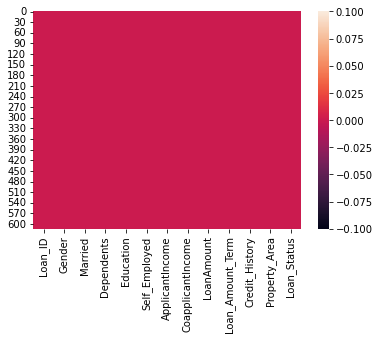

In [13]:
sns.heatmap(Loan.isnull())

In [14]:
Loan.duplicated().sum()

0

Univariate Analysis 'Subscribed' variable

In [15]:
#Frequency of 'subscribed'
Loan['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

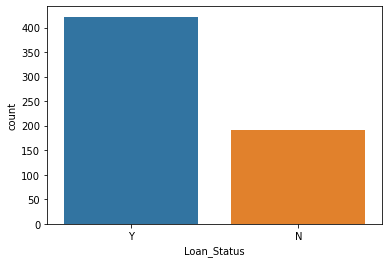

In [16]:
# Plotting the 'subscribed' frequency
sns.countplot(data=Loan,x='Loan_Status')

In [17]:
#Normalizing the frequency table of 'Subscribed' variable
Loan['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

In [18]:
#Frequency table
Loan['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

We have two counts in Loan_Status namely "Y" and "N". Here "Y" stands for "Yes" that is the loan of the applicant is approved and "N" stands for "No" that is the loan of the applicant is not approved. Here loan approved has high counts than loan not approved... and target value is imbalance we will balance it later

# EDA

Lets Convert all catagorical columns to into int format By Encoding

In [19]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()
for i in Loan.columns:
    if Loan[i].dtypes=='object':
        Loan[i]=enc.fit_transform(Loan[i].values.reshape(-1,1))
Loan

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0.0,1.0,0.0,0.0,0.0,0.0,5849,0.0,128.0,360.0,1.0,2.0,1.0
1,1.0,1.0,1.0,1.0,0.0,0.0,4583,1508.0,128.0,360.0,1.0,0.0,0.0
2,2.0,1.0,1.0,0.0,0.0,1.0,3000,0.0,66.0,360.0,1.0,2.0,1.0
3,3.0,1.0,1.0,0.0,1.0,0.0,2583,2358.0,120.0,360.0,1.0,2.0,1.0
4,4.0,1.0,0.0,0.0,0.0,0.0,6000,0.0,141.0,360.0,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,609.0,0.0,0.0,0.0,0.0,0.0,2900,0.0,71.0,360.0,1.0,0.0,1.0
610,610.0,1.0,1.0,3.0,0.0,0.0,4106,0.0,40.0,180.0,1.0,0.0,1.0
611,611.0,1.0,1.0,1.0,0.0,0.0,8072,240.0,253.0,360.0,1.0,2.0,1.0
612,612.0,1.0,1.0,2.0,0.0,0.0,7583,0.0,187.0,360.0,1.0,2.0,1.0


All object Values are converted into  Float and Int

In [20]:
Loan.dtypes

Loan_ID              float64
Gender               float64
Married              float64
Dependents           float64
Education            float64
Self_Employed        float64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area        float64
Loan_Status          float64
dtype: object

Graphical representation of Data

A. Univariate Analysis

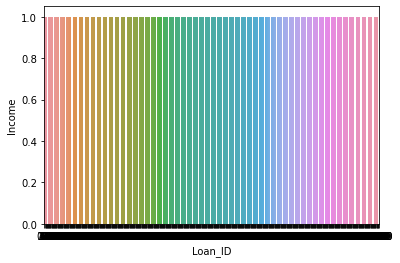

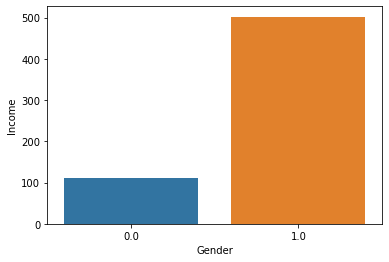

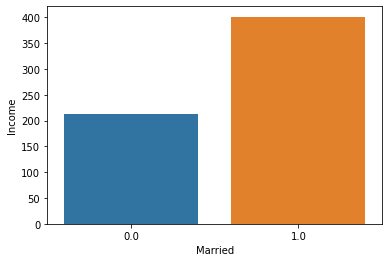

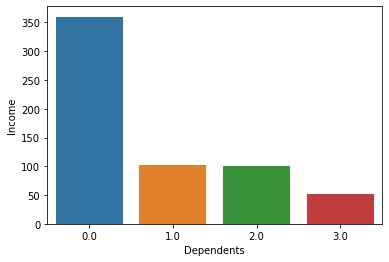

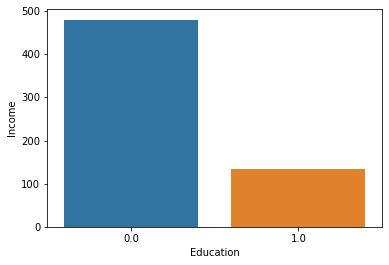

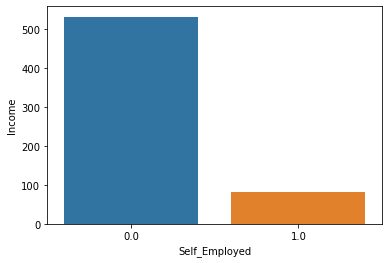

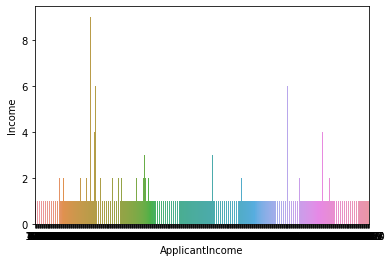

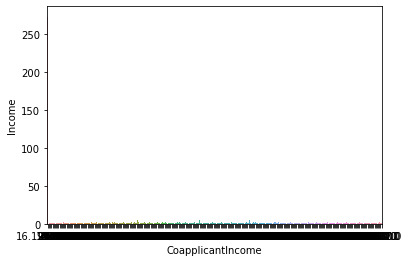

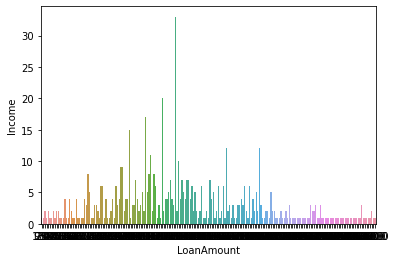

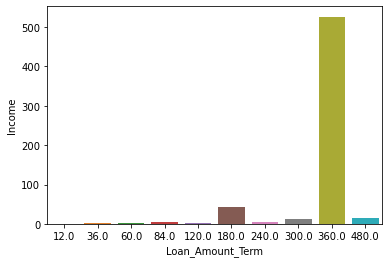

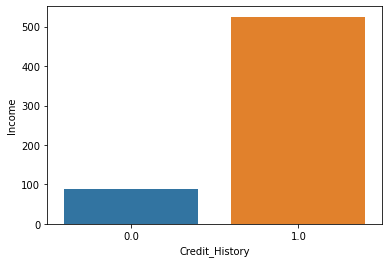

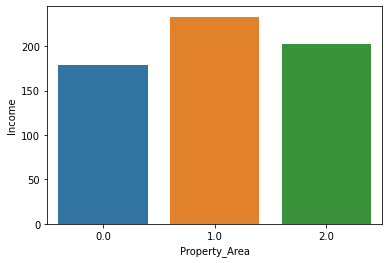

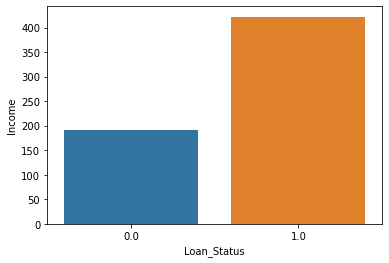

In [21]:
for column in Loan.columns:
    sns.countplot(x=column, data=Loan)
    plt.xlabel(column)
    plt.ylabel('Income')
    plt.show()

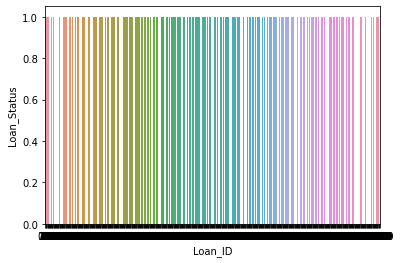

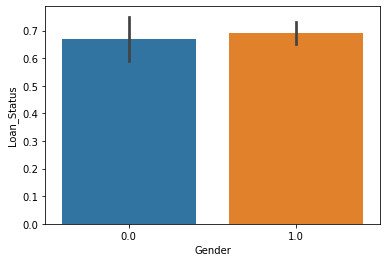

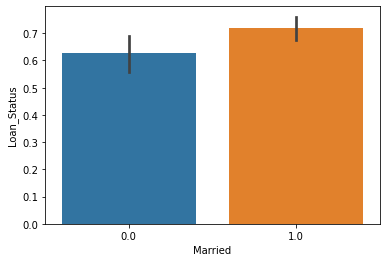

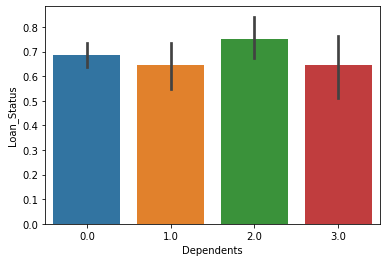

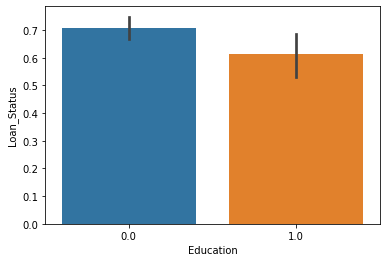

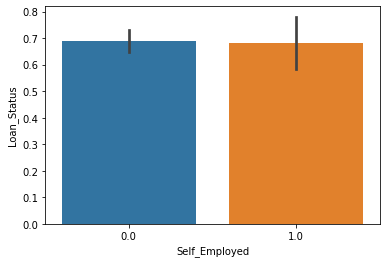

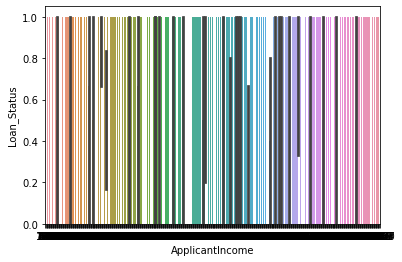

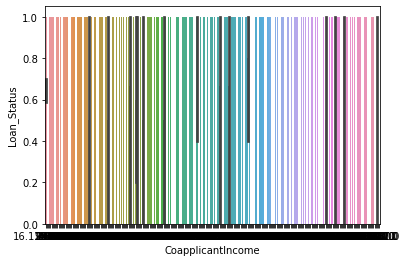

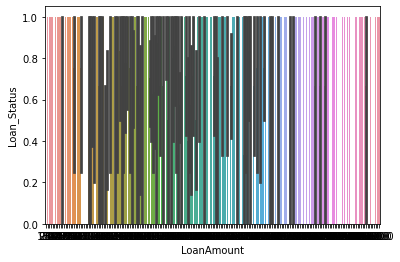

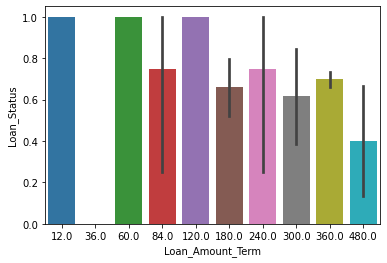

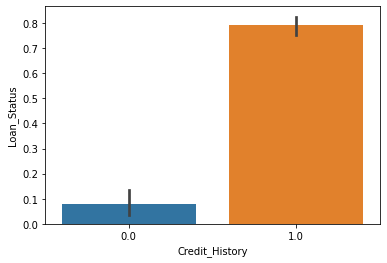

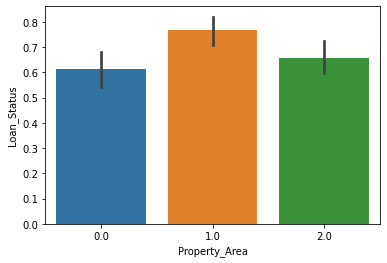

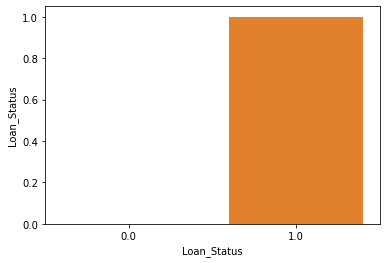

In [22]:
for column in Loan.columns:
    sns.barplot(x=column, y='Loan_Status', data=Loan)
    plt.xlabel(column)
    plt.show()

array([[<AxesSubplot:title={'center':'Loan_ID'}>,
        <AxesSubplot:title={'center':'Gender'}>,
        <AxesSubplot:title={'center':'Married'}>,
        <AxesSubplot:title={'center':'Dependents'}>],
       [<AxesSubplot:title={'center':'Education'}>,
        <AxesSubplot:title={'center':'Self_Employed'}>,
        <AxesSubplot:title={'center':'ApplicantIncome'}>,
        <AxesSubplot:title={'center':'CoapplicantIncome'}>],
       [<AxesSubplot:title={'center':'LoanAmount'}>,
        <AxesSubplot:title={'center':'Loan_Amount_Term'}>,
        <AxesSubplot:title={'center':'Credit_History'}>,
        <AxesSubplot:title={'center':'Property_Area'}>],
       [<AxesSubplot:title={'center':'Loan_Status'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

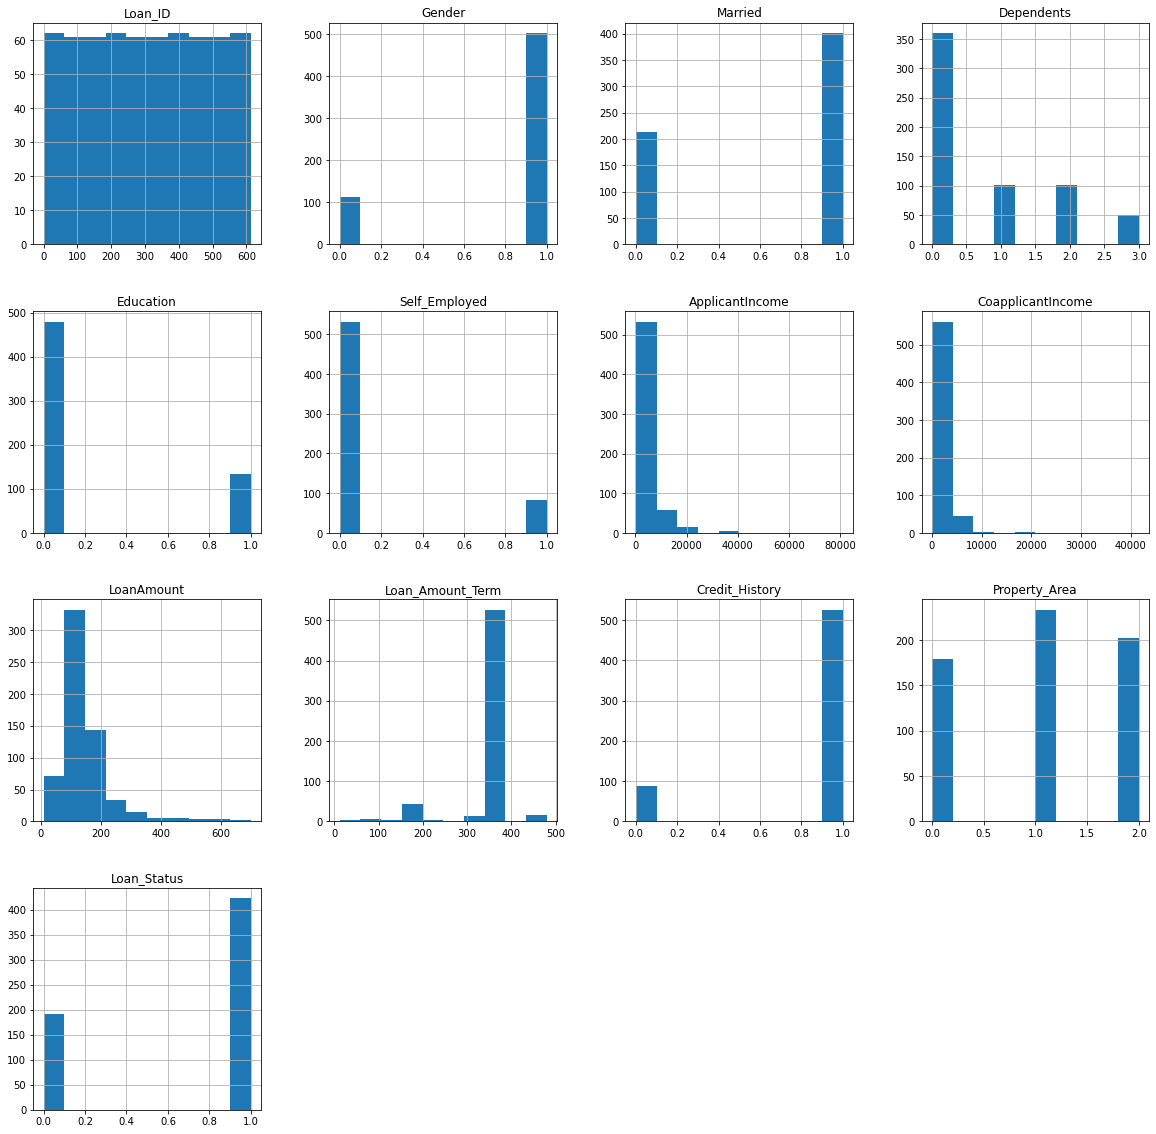

In [23]:
Loan.hist(bins=10, figsize=(20,20))

Bivarate

In [24]:
Loan.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

<AxesSubplot:xlabel='Loan_ID', ylabel='Loan_Status'>

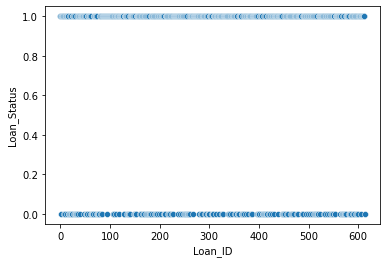

In [25]:
sns.scatterplot(x='Loan_ID',y='Loan_Status',data=Loan)

<AxesSubplot:xlabel='Gender', ylabel='Loan_Status'>

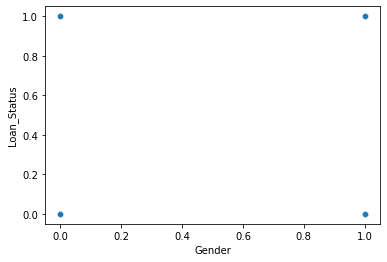

In [26]:
sns.scatterplot(x='Gender',y='Loan_Status',data=Loan)

<AxesSubplot:xlabel='Dependents', ylabel='Loan_Status'>

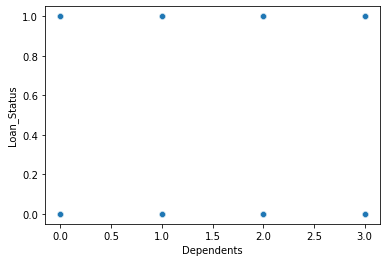

In [27]:
sns.scatterplot(x='Dependents',y='Loan_Status',data=Loan)

<AxesSubplot:xlabel='Married', ylabel='Loan_Status'>

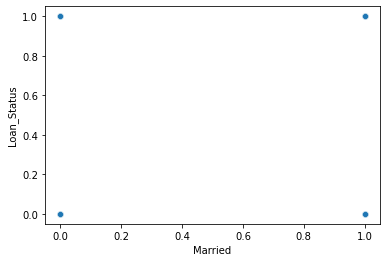

In [28]:
sns.scatterplot(x='Married',y='Loan_Status',data=Loan)

<AxesSubplot:xlabel='Education', ylabel='Loan_Status'>

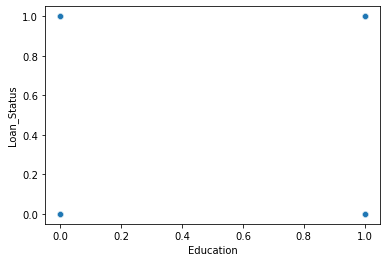

In [29]:
sns.scatterplot(x='Education',y='Loan_Status',data=Loan)

<AxesSubplot:xlabel='Self_Employed', ylabel='Loan_Status'>

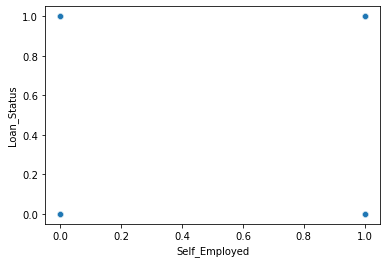

In [30]:
sns.scatterplot(x='Self_Employed',y='Loan_Status',data=Loan)

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Loan_Status'>

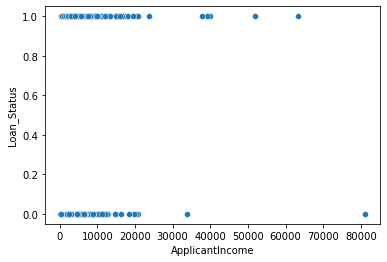

In [31]:
sns.scatterplot(x='ApplicantIncome',y='Loan_Status',data=Loan)

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Loan_Status'>

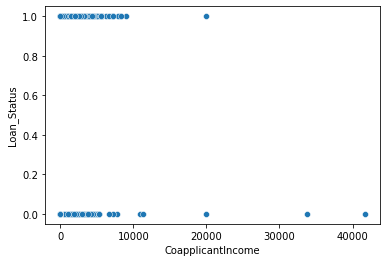

In [32]:
sns.scatterplot(x='CoapplicantIncome',y='Loan_Status',data=Loan)

<AxesSubplot:xlabel='LoanAmount', ylabel='Loan_Status'>

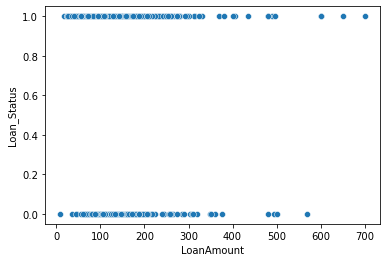

In [33]:
sns.scatterplot(x='LoanAmount',y='Loan_Status',data=Loan)

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Loan_Status'>

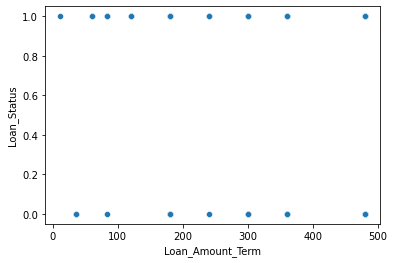

In [34]:
sns.scatterplot(x='Loan_Amount_Term',y='Loan_Status',data=Loan)

<AxesSubplot:xlabel='Credit_History', ylabel='Loan_Status'>

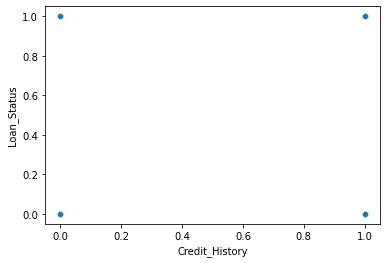

In [35]:
sns.scatterplot(x='Credit_History',y='Loan_Status',data=Loan)

<AxesSubplot:xlabel='Property_Area', ylabel='Loan_Status'>

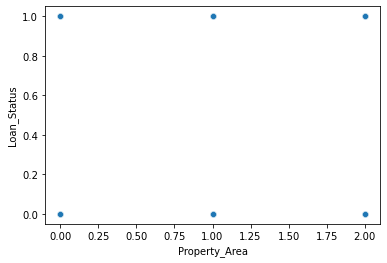

In [36]:
sns.scatterplot(x='Property_Area',y='Loan_Status',data=Loan)

<AxesSubplot:xlabel='Loan_ID', ylabel='Density'>

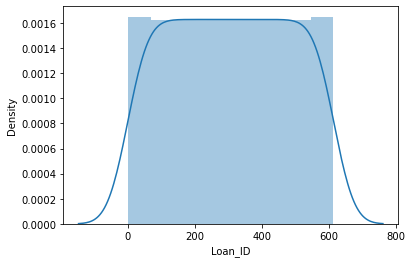

In [37]:
sns.distplot(Loan['Loan_ID'])

<AxesSubplot:xlabel='Gender', ylabel='Density'>

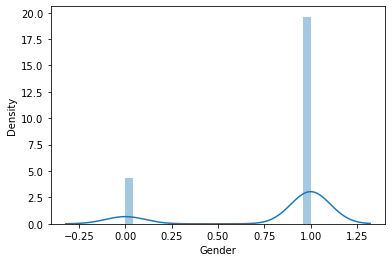

In [38]:
sns.distplot(Loan['Gender'])

<AxesSubplot:xlabel='Married', ylabel='Density'>

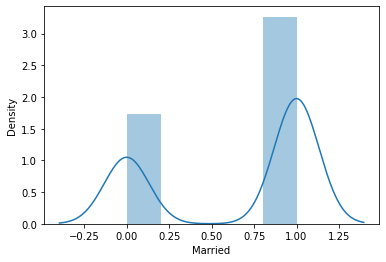

In [39]:
sns.distplot(Loan['Married'])

<AxesSubplot:xlabel='Dependents', ylabel='Density'>

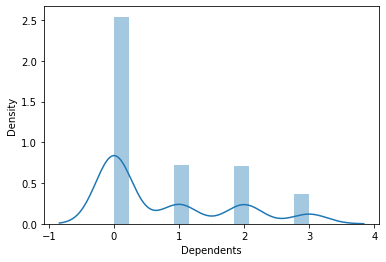

In [40]:
sns.distplot(Loan['Dependents'])

<AxesSubplot:xlabel='Education', ylabel='Density'>

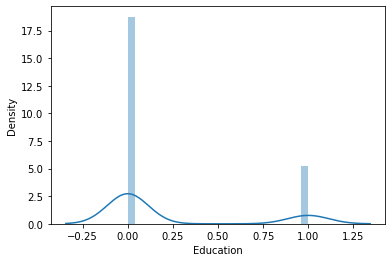

In [41]:
sns.distplot(Loan['Education'])

<AxesSubplot:xlabel='Self_Employed', ylabel='Density'>

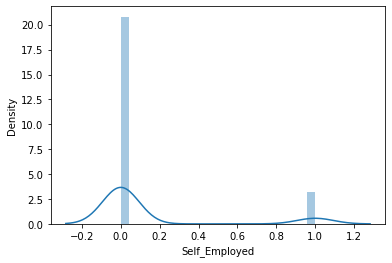

In [42]:
sns.distplot(Loan['Self_Employed'])

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

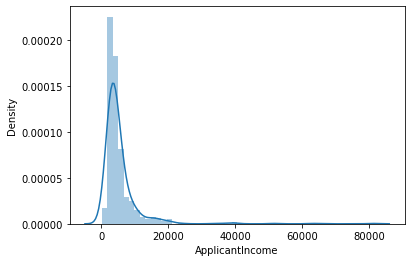

In [43]:
sns.distplot(Loan['ApplicantIncome'])

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

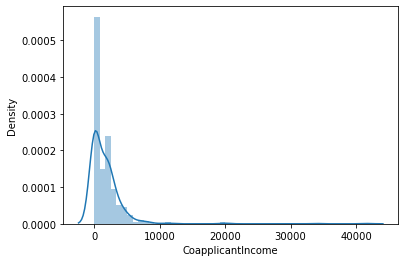

In [44]:
sns.distplot(Loan['CoapplicantIncome'])

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

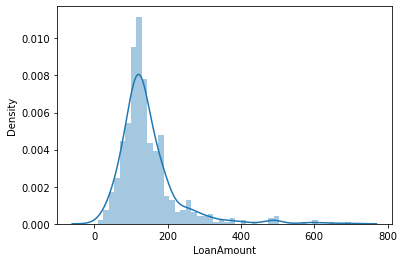

In [45]:
sns.distplot(Loan['LoanAmount'])

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Density'>

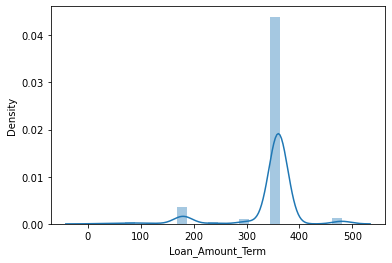

In [46]:
sns.distplot(Loan['Loan_Amount_Term'])

<AxesSubplot:xlabel='Credit_History', ylabel='Density'>

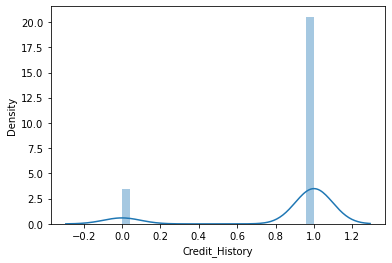

In [47]:
sns.distplot(Loan['Credit_History'])

<AxesSubplot:xlabel='Property_Area', ylabel='Density'>

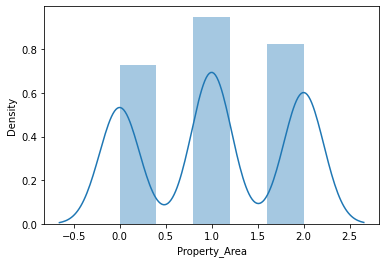

In [48]:
sns.distplot(Loan['Property_Area'])

<AxesSubplot:xlabel='Loan_Status', ylabel='Density'>

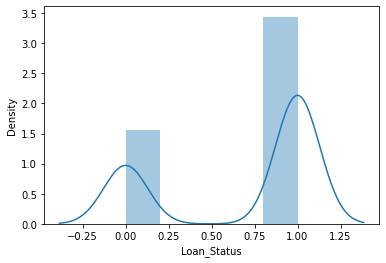

In [49]:
sns.distplot(Loan['Loan_Status'])

<AxesSubplot:xlabel='Credit_History', ylabel='Density'>

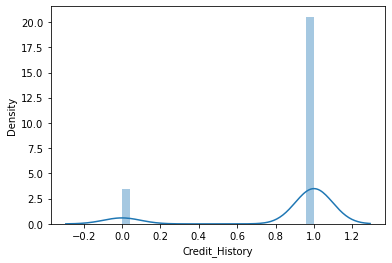

In [50]:
sns.distplot(Loan['Credit_History'])

Univarate Outcome

more number of Male applicants applying for loan than Female applicants.
81% of the Male candidates and only 18% of Female candidates are applying for the loan.
more number of married people who are taking loan in comparision with unmarried
The applicants who have 0 dependents have high counts and the applicants having more than 3 dependents counts are very less. 
Graduate people are more who are appliying for loan in comparision to not graduate 
Most of the applicants or not self employed only 82 applicants are self employed and running their own bussiness.
Most of the applicants who have credit history 1 are high in numbers
Co-applicant income seems to be on Zero by graph,the average is just 1621 
Average Loan amount is 128 We can see that maximum count for loan is from Semiurban area than followed by urban and least is Rural

BiVarate Outcome

The count of 0 dependents is high which means most of the applicants have no dependents. Having dependents means having commitments.
The 3+ dependents means more than 3 applicants have dependents. The applicants who have dependents 0 are more likely to get their loan approved.
We can see that in case of Gender Males are getting more loans as Compared to Females, this may be because male applicant are more in number
We can see that maximum loan is Granted and applied by the People who are Married as Compared to the People who are single
We can see that the people who are Graduate are been granted Loans and compared to Not graduates .. this May because of his qualification or Education that makes my capable for the repayement of the loan
There is a vast difference in count of No and Yes inside this columns ..
We can see that the people who are not self employed has applied in large number and have been granted loan and people who are self employed applied for loans are less

Multivariate Analysis

<Figure size 2160x2160 with 0 Axes>

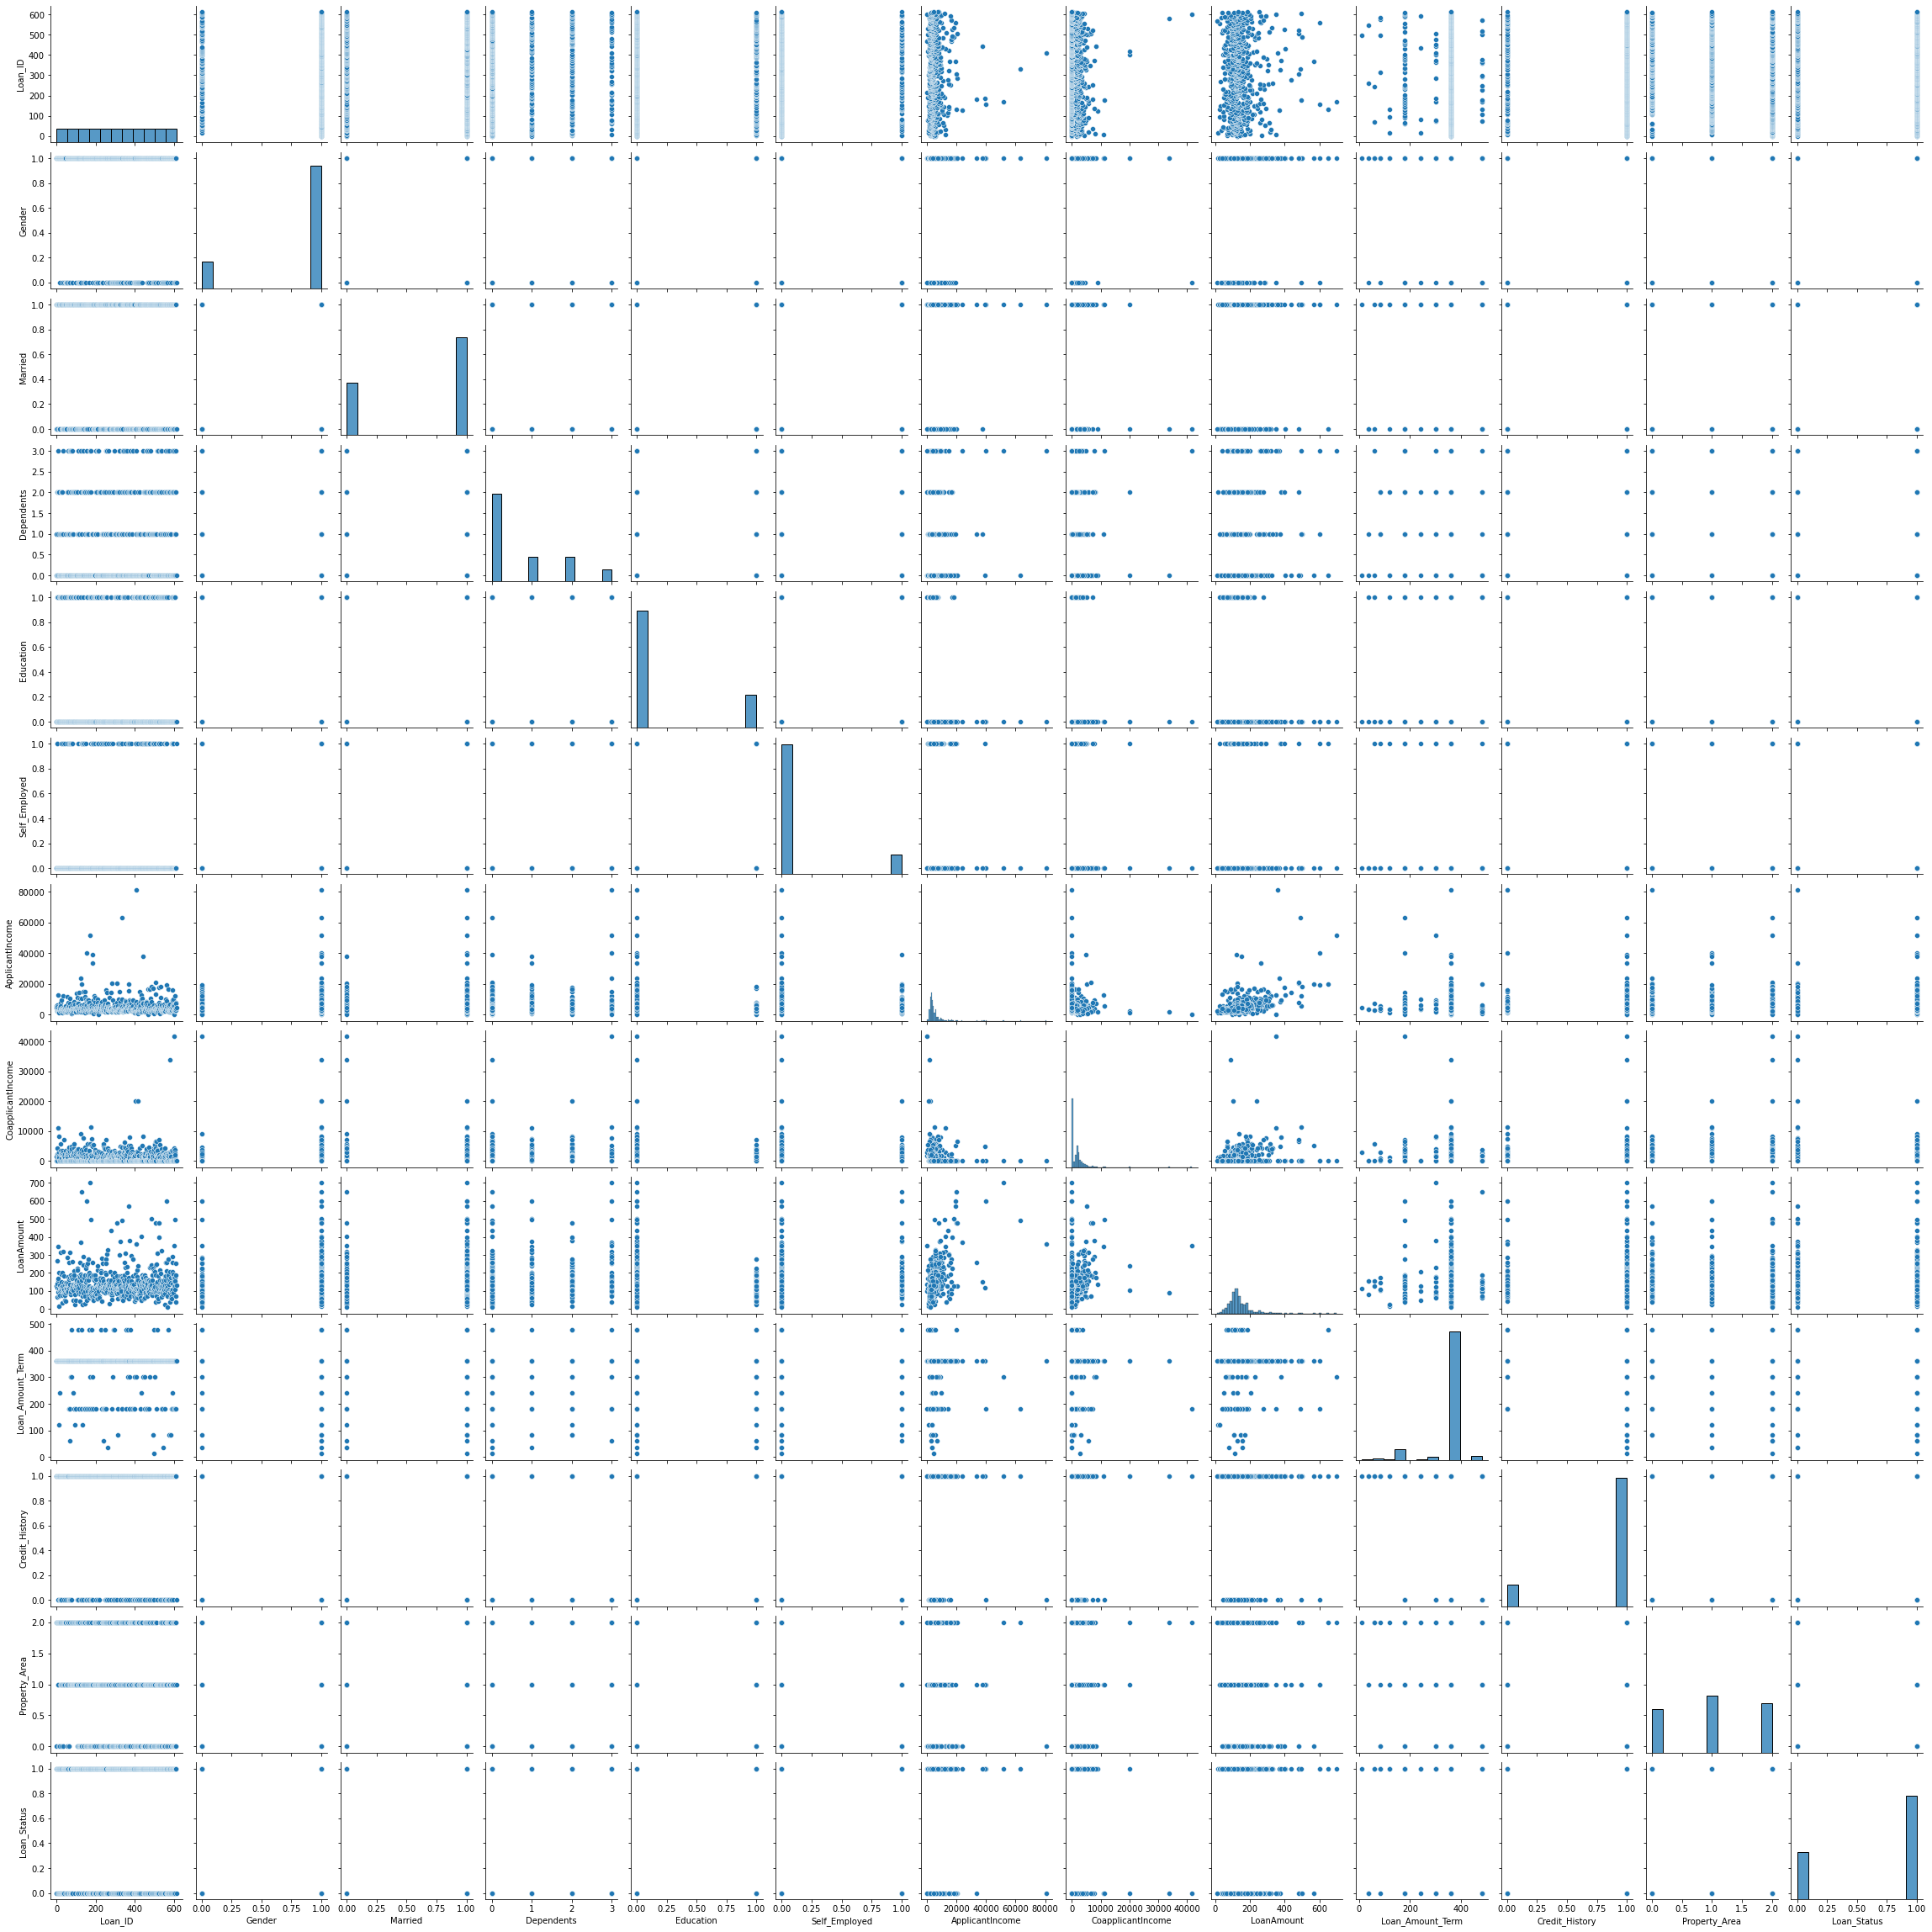

In [51]:
plt.figure(figsize=(30,30))
sns.pairplot(Loan)
plt.show()

This pair plot gives the pairwise relation between the columns which is plotted on the basis of target variable "Loan_Status".
Here we can observe the relation between the features and label.
We can observe the linear relationship between ApplicantIncome and LoanAmount, CoapplicantIncome and LoanAmount, ApplicantIncome and TotalIncome.
We can also observe the correlation in some columns also there are outliers present in some of the columns.

Now Lets See that counts of each columns

In [52]:
for i in Loan.columns:
        print(Loan[i].value_counts())
        print('*'*100)

0.0      1
412.0    1
405.0    1
406.0    1
407.0    1
        ..
205.0    1
206.0    1
207.0    1
208.0    1
613.0    1
Name: Loan_ID, Length: 614, dtype: int64
****************************************************************************************************
1.0    502
0.0    112
Name: Gender, dtype: int64
****************************************************************************************************
1.0    401
0.0    213
Name: Married, dtype: int64
****************************************************************************************************
0.0    360
1.0    102
2.0    101
3.0     51
Name: Dependents, dtype: int64
****************************************************************************************************
0.0    480
1.0    134
Name: Education, dtype: int64
****************************************************************************************************
0.0    532
1.0     82
Name: Self_Employed, dtype: int64
***************************************************

CORRELATION

<AxesSubplot:>

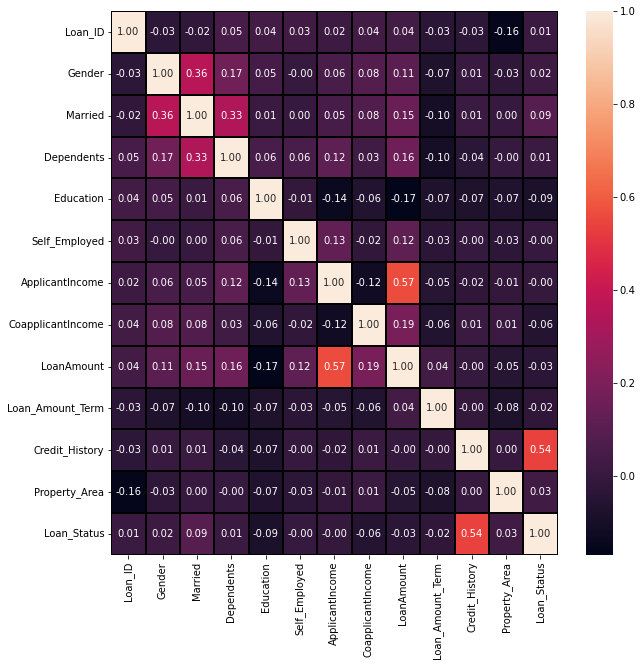

In [53]:
plt.figure(figsize = (10,10))
sns.heatmap(Loan.corr(),annot=True,linewidths=0.1,linecolor="black",fmt="0.2f")

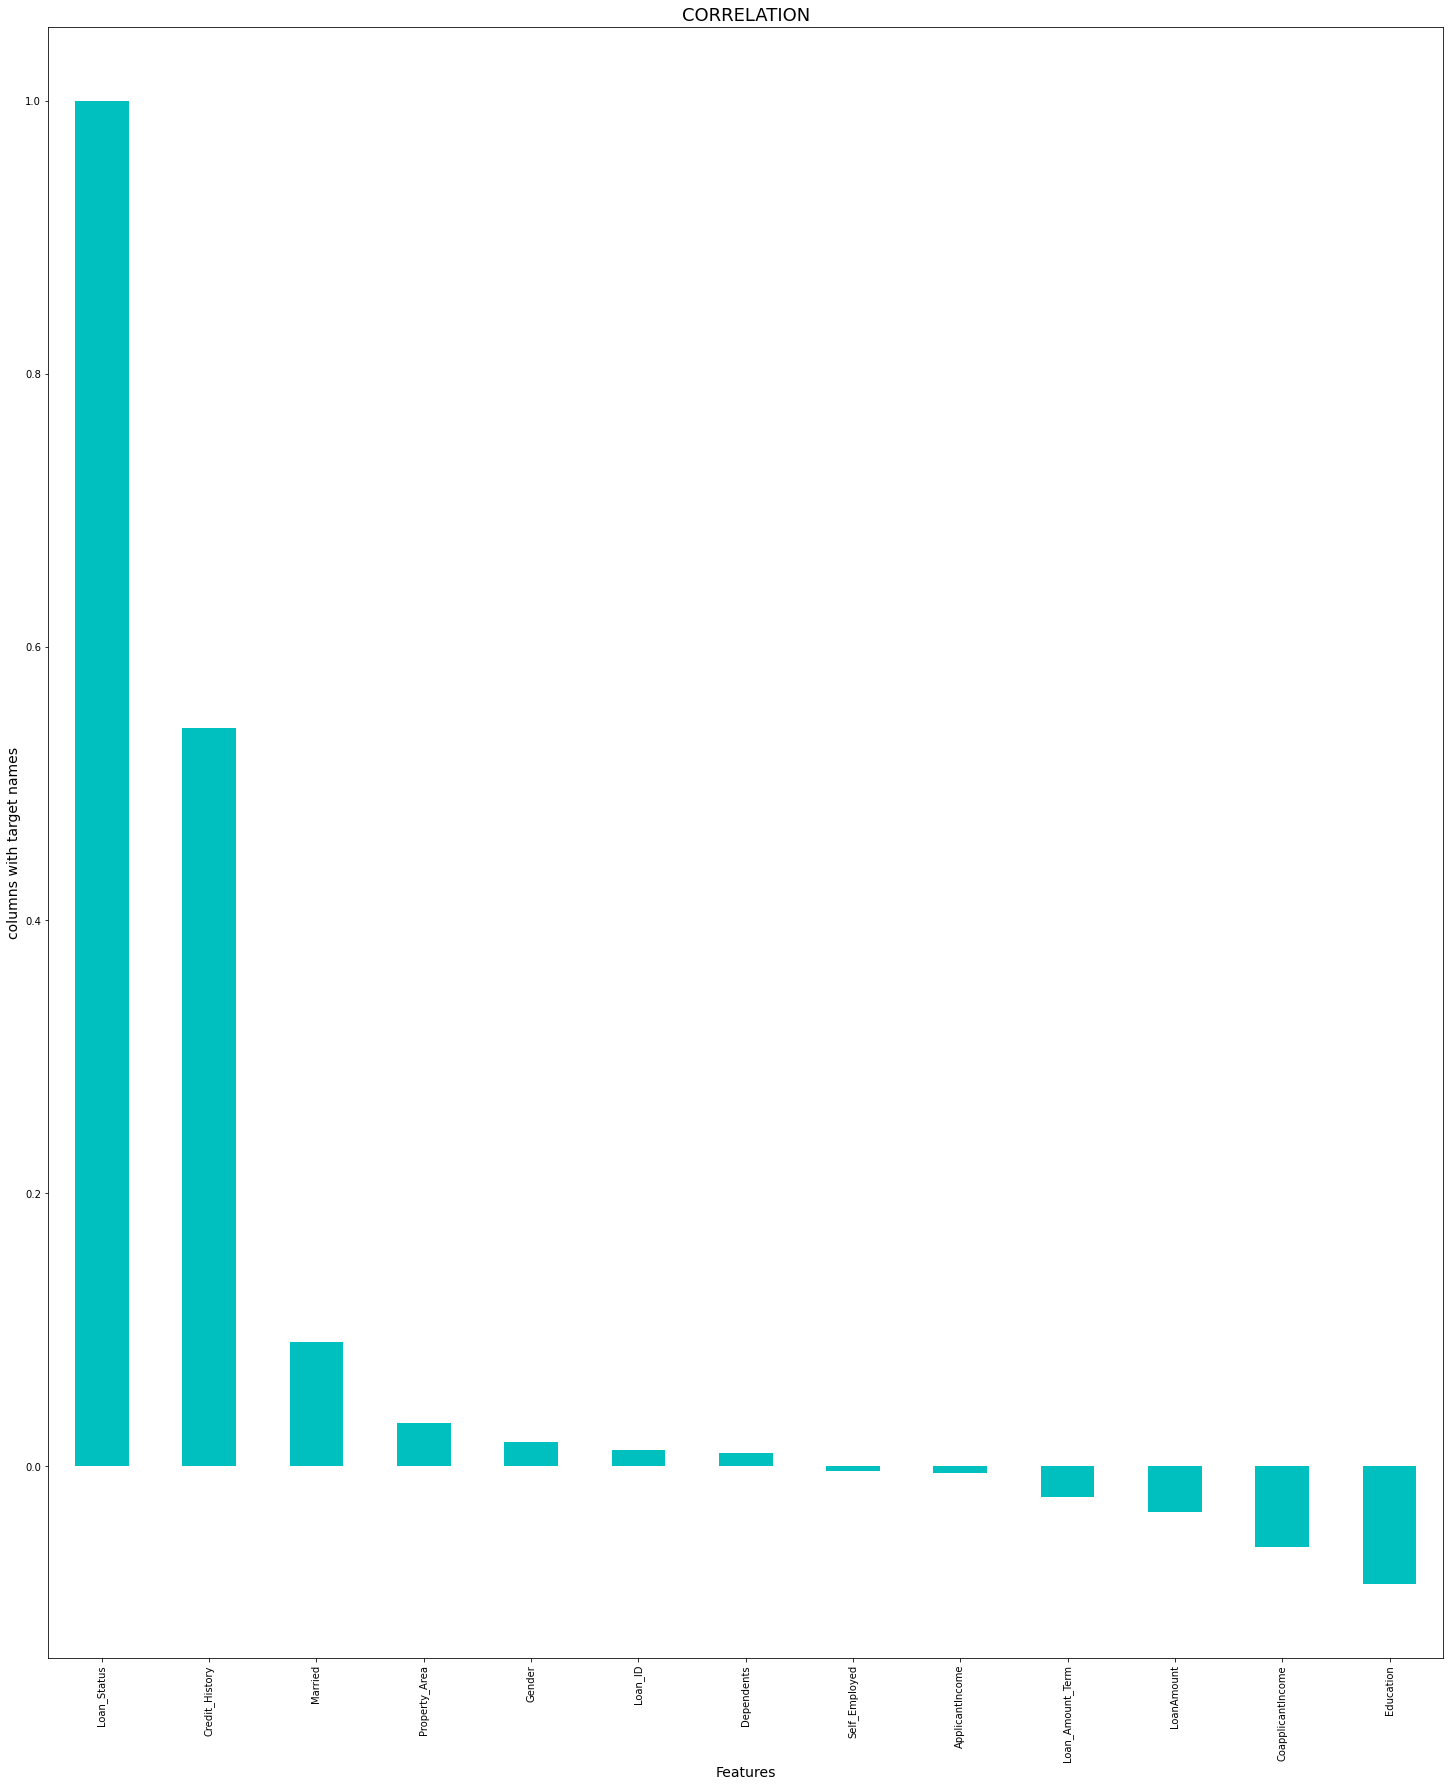

In [54]:
#checking the columns which are positively and negatively correlated
plt.figure(figsize=(25,30))
Loan.corr()['Loan_Status'].sort_values(ascending=False).plot(kind='bar',color='c')
plt.xlabel('Features',fontsize=14)
plt.ylabel('columns with target names',fontsize=14)
plt.title('CORRELATION',fontsize=18)
plt.show()

Heatmap shows the correlation matrix by visualizing the data. we can observe the relation between feature to feature and feature to label. This heat mapcontains both positive and negative correlation..
This heatmap shows the correlation matrix by visualizing the data. we can observe the relation between one feature to other.
This heat mapcontains both positive and negative correlation.

The target column Loan_Status is highly positively correlated with the feature Credit_History.

The other features have very less correlation with the target column.

Also we can notice there is no multicollinearity issue in the features. Features have moderate level of correlation with each other.

ApplicantIncome and Gender is very less correlated with the target.

Dark shades are highly correlated and light shades are very less correlated.

#Census.drop(['Relationship','Marital_status'],axis=1)

In [55]:
Loan.corr()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,1.000000,-0.028029,-0.016013,0.051559,0.039442,0.032874,0.016925,0.039211,0.036872,-0.033028,-0.030603,-0.155416,0.011773
Gender,-0.028029,1.000000,0.364569,0.172914,0.045364,-0.000525,0.058809,0.082912,0.106904,-0.074030,0.009170,-0.025752,0.017987
Married,-0.016013,0.364569,1.000000,0.334216,0.012304,0.004489,0.051708,0.075948,0.146546,-0.100912,0.010938,0.004257,0.091478
Dependents,0.051559,0.172914,0.334216,1.000000,0.055752,0.056798,0.118202,0.030430,0.163103,-0.103864,-0.040160,-0.000244,0.010118
Education,0.039442,0.045364,0.012304,0.055752,1.000000,-0.010383,-0.140760,-0.062290,-0.168759,-0.073928,-0.073658,-0.065243,-0.085884
Self_Employed,0.032874,-0.000525,0.004489,0.056798,-0.010383,1.000000,0.127180,-0.016100,0.115100,-0.033739,-0.001550,-0.030860,-0.003700
ApplicantIncome,0.016925,0.058809,0.051708,0.118202,-0.140760,0.127180,1.000000,-0.116605,0.565181,-0.046531,-0.018615,-0.009500,-0.004710
CoapplicantIncome,0.039211,0.082912,0.075948,0.030430,-0.062290,-0.016100,-0.116605,1.000000,0.189218,-0.059383,0.011134,0.010522,-0.059187
LoanAmount,0.036872,0.106904,0.146546,0.163103,-0.168759,0.115100,0.565181,0.189218,1.000000,0.036960,-0.000607,-0.046632,-0.033214
Loan_Amount_Term,-0.033028,-0.074030,-0.100912,-0.103864,-0.073928,-0.033739,-0.046531,-0.059383,0.036960,1.000000,-0.004705,-0.076120,-0.022549


In [56]:
Loan.corr()['Loan_Status'].sort_values()

Education           -0.085884
CoapplicantIncome   -0.059187
LoanAmount          -0.033214
Loan_Amount_Term    -0.022549
ApplicantIncome     -0.004710
Self_Employed       -0.003700
Dependents           0.010118
Loan_ID              0.011773
Gender               0.017987
Property_Area        0.032112
Married              0.091478
Credit_History       0.540556
Loan_Status          1.000000
Name: Loan_Status, dtype: float64

least correlated feature with target is self_employed and Applicantincome.. we are not dropping this as we have less columns and i dont want to loose any info

# DESCRIPTIVE STATSTICS

In [57]:
Loan.describe().T

,count,mean,std,min,25%,50%,75%,max
Loan_ID,614.0,306.500000,177.390811,0.0,153.25,306.5,459.75,613.0
Gender,614.0,0.817590,0.386497,0.0,1.00,1.0,1.00,1.0
Married,614.0,0.653094,0.476373,0.0,0.00,1.0,1.00,1.0
Dependents,614.0,0.744300,1.009623,0.0,0.00,0.0,1.00,3.0
Education,614.0,0.218241,0.413389,0.0,0.00,0.0,0.00,1.0
Self_Employed,614.0,0.133550,0.340446,0.0,0.00,0.0,0.00,1.0
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.50,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.00,1188.5,2297.25,41667.0
LoanAmount,614.0,145.752443,84.107233,9.0,100.25,128.0,164.75,700.0
Loan_Amount_Term,614.0,342.410423,64.428629,12.0,360.00,360.0,360.00,480.0


This gives the statistical information of the dataset. The summary of this dataset looks perfect since there is no negative/ invalid values present. It gives the summary of numerical data.
From the above description we can observe the following things:
    
The counts of all the columns are same which means there are no null values present in the dataset.
The mean value is greater than the median(50%) in ApplicantIncome, CoapplicantIncome, LoanAmount which means they are skewed to right.
The median is greater than the mean in Loan_Amount_Term and Credit_History which means they are skewed to left.
There is a huge difference between mean and the standard deviation.
In summarizing the data we can infer that there is a huge difference in max and 75% percentile means there are huge outliers present in the dataset. 
We will remove outliers using Zscore .

<AxesSubplot:>

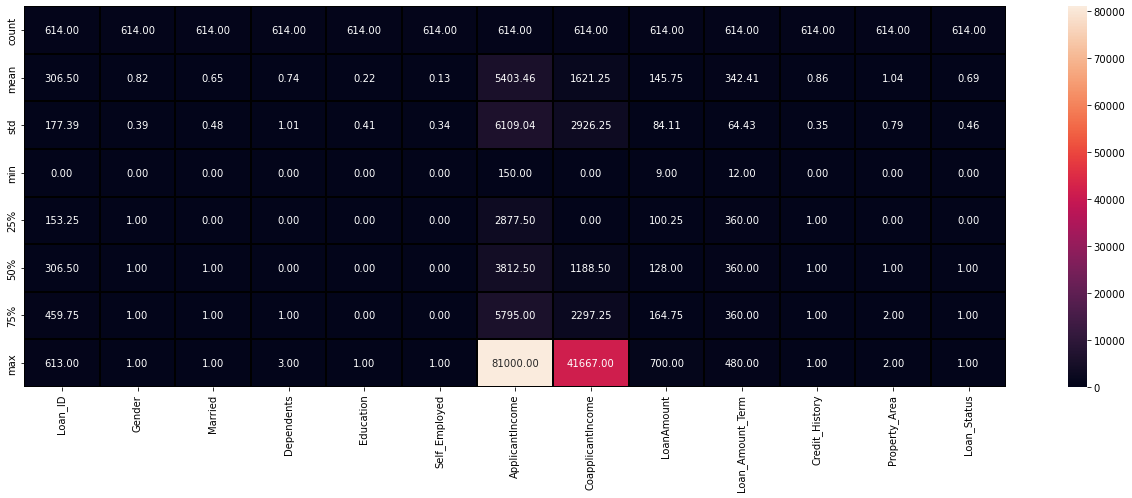

In [58]:
plt.figure(figsize = (22,7))
sns.heatmap(Loan.describe(),annot=True,linewidths=0.1,linecolor="black",fmt="0.2f")

In [59]:
Loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    float64
 1   Gender             614 non-null    float64
 2   Married            614 non-null    float64
 3   Dependents         614 non-null    float64
 4   Education          614 non-null    float64
 5   Self_Employed      614 non-null    float64
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    float64
 12  Loan_Status        614 non-null    float64
dtypes: float64(12), int64(1)
memory usage: 83.3 KB


Now lets Check And Remove Outliers in the dataset 
OUTLIERS CHECKING(Any One outlier method can be  used)

In [60]:
colmlist=Loan.columns.values
ncol=30
nrows=14

In [ ]:
plt.figure(figsize=(ncol,3*ncol))
for i in range (0,len(colmlist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(data=Loan[colmlist[i]],color='green',orient='v')
    plt.tight_layout()

In [ ]:
# to find out outliers in the dataset
Loan.plot(kind='box',subplots=True,figsize=(20,10))

In [ ]:
#Lets plot all using Histogram and see the skewness again
 
plt.rcParams['figure.figsize']=(30,20)
Loan.hist(bins=25,color='green',density=True,label='Value',histtype='bar')
plt.show()

In [ ]:
#to check for outliers through zscore 
from scipy.stats import zscore
(np.abs(zscore( Loan)) < 3).all()

In [ ]:
#to remove outliers in data set through zscore
z = np.abs(zscore( Loan))
z.shape

In [ ]:
threshold = 3
print(np.where(z>3))

In [ ]:
Loan_new=Loan[(z<3).all(axis=1)]
print(Loan_new.shape)


In [ ]:
Loan.shape

In [ ]:
print ("Old DataFrame =",Loan.shape)
print ("New DataFrame =",Loan_new.shape)
print ("Total dropped rows = ",Loan.shape[0] -Loan_new.shape[0])

In [ ]:
#to find % loss in data
loss = (614-577)/614 * 100
print(loss)

In [ ]:
Loan_new

Now Lets Split the dataset into dependent and independent variable

In [ ]:
# Independent column

x=Loan_new.iloc[:,0:-1]
x

In [ ]:
x.shape

In [ ]:
# Target or dependent variable

y=Loan_new.iloc[:,-1]
y.shape

In [ ]:
y

# TRANSFORMING DATA TO REMOVE SKEWNESS

In [ ]:
Loan

In [ ]:
Loan_new.skew()

In [ ]:
from sklearn.preprocessing import power_transform
x_new=power_transform(Loan,method='yeo-johnson')

In [ ]:
pd.DataFrame(x_new).skew()

In [ ]:
# It will be a 2 dimensional data containg rows and columns

from sklearn.preprocessing import StandardScaler
#transforming my dataset into a standard normal distribution
sc=StandardScaler()

x= pd.DataFrame(sc.fit_transform(x), columns=x.columns)
x

In [ ]:
x.mean()

In [ ]:
x.std()

In [ ]:
Loan['Loan_Status'].value_counts()


Balancing the dataset over here,otherwise it will be a baised dataset

In [ ]:
smt=SMOTE()
x,y=smt.fit_resample(x,y)

In [ ]:
x.shape

In [ ]:
y.value_counts()

In [ ]:
plt.figure(figsize=(8,8))
sns.countplot(y)

WE CHECK MULTICOLLINEARITY BY VARIANCE INFLATION FACTOR (VIF)

In [ ]:
def vif_cal():
    vif=pd.DataFrame()
    vif["VIF FACTOR"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif["FEATURES"]=x.columns
    print (vif)

In [ ]:
vif_cal()

# No Multicollinearity is present in the dataset...Here we can observe all the columns have VIF less than 10 which means we are free from multicollinearity problem. Let's move to buliding machine learning models...


Model Training And Training

In [ ]:
# to predict best random state value
maxAcc =0
maxRS=0

for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=i)
    LR = LogisticRegression()
    LR.fit(x_train,y_train)
    predrf = LR.predict(x_test)
    acc=accuracy_score(y_test,predrf)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print('Best accuracy is',maxAcc,'on Random_State',maxRS)

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=78)

In [ ]:
print('shape of x_train:',x_train.shape)
print('shape of y_train:',x_train.shape)
print('shape of x_test:',x_test.shape)
print('shape of y_test:',y_test.shape)

In [ ]:
x_train

In [ ]:
y_test

In [ ]:
x_test

In [ ]:
y_train

CROSS VALIDATION FOR LOGISTICS REGRESSION,ENSEMBLE TECHNIQUE(GradientBoostingClassifier,RandomForestClassifier)

In [ ]:
lg=LogisticRegression()
gnb=GaussianNB()
svc=SVC()
dtc=DecisionTreeClassifier()
knn=KNeighborsClassifier()
gb = GradientBoostingClassifier()
RF = RandomForestClassifier()
ada = AdaBoostClassifier()

model=[lg,gnb,svc,dtc,knn,RF,gb,ada]
for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print("Accuracy_score:",m,'is')
    print(confusion_matrix(y_test, predm))
    print(accuracy_score(y_test,predm)*100)
    print(classification_report(y_test,predm))
    print('\n')

In [ ]:
#cross validation to check the accuracy score
print('cross validation score of random forest model = ', cross_val_score(RF,x,y,cv=None).mean()*100)
print('cross validation score of logistic regression model = ', cross_val_score(lg,x,y,cv=None).mean()*100)
print('cross validation score of decison tree model = ', cross_val_score(dtc,x,y,cv=None).mean()*100)
print('cross validation score of  KNeighborsClassifier model = ', cross_val_score(knn,x,y,cv=None).mean()*100)
print('cross validation score of standard vector machine model = ', cross_val_score(svc,x,y,cv=None).mean()*100)
print('cross validation score of GaussianNB model = ', cross_val_score(gnb,x,y,cv=None).mean()*100)
print('cross validation score of GradientBoostingClassifier model = ',cross_val_score(gb,x,y,cv=None).mean()*100)
print('cross validation score of AdaBoostingClassifier model = ',cross_val_score(ada,x,y,cv=None).mean()*100)

Hyper parameter tuning

Plotting ROC and compare AUC for all the models used

In [ ]:
# hyperparameter tuning with RandomForestClassifier, parameters of RandomForestClassifier
params={'n_neighbors':[(1)],'weights':['uniform', 'distance'],'metric':['euclidean', 'manhattan', 'minkowski']}

In [ ]:
# hyperparameter tuning with gridsearchCV
gcv = GridSearchCV(knn, params, n_jobs=-1, cv=10)


In [ ]:
#training the model
gcv.fit(x_train,y_train)

In [ ]:
#finding out which parameter is giving best accuracy
gcv.best_params_

In [ ]:
type(gcv)

In [ ]:
# finding best estimator
gcv.best_estimator_

In [ ]:
# Applying the parameters to the final model
pred = gcv.best_estimator_.predict(x_test)
acc =accuracy_score(y_test,pred)
print(acc*100)

ROC AUC Scores

In [ ]:
from sklearn.metrics import RocCurveDisplay
disp=RocCurveDisplay.from_estimator(RF, x_test, y_test)
svc_disp = RocCurveDisplay.from_estimator(gcv, x_test, y_test)
svc_disp = RocCurveDisplay.from_estimator(knn, x_test, y_test)
svc_disp = RocCurveDisplay.from_estimator(dtc, x_test, y_test)
svc_disp = RocCurveDisplay.from_estimator(svc, x_test, y_test)
svc_disp = RocCurveDisplay.from_estimator(lg, x_test, y_test)
svc_disp = RocCurveDisplay.from_estimator(ada, x_test, y_test)
svc_disp = RocCurveDisplay.from_estimator(gb, x_test, y_test)
svc_disp = RocCurveDisplay.from_estimator(RF, x_test, y_test)
#rfc_disp = RocCurveDisplay.from_estimator(rfc, x_test, y_test, ax=svc_disp.ax_)
plt.title("AUC ROC plot")
plt.legend(prop={'size':11}, loc='lower right')

In [ ]:
gsv=GridSearchCV
dtc.fit(x_train,y_train)
y_pred=dtc.predict(x_test)
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds=roc_curve(y_pred,y_test)
roc_auc=auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label='ROC Curve(area=%0.2f)' % roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True positive rate')
plt.title('Receiver operating Characteristic')
plt.legend(loc="lower right")
plt.show()

Save the Model

In [ ]:
#saving the model
import joblib
joblib.dump(gcv,'Loan Status.pkl')

In [ ]:
#Loading the saved model
LS=joblib.load('Loan Status.pkl')

In [ ]:
prediction = LS.predict(x_test)
prediction

In [ ]:
pd.DataFrame([LS.predict(x_test)[:],y_test[:]],index=["Predicted","Original"])

In [ ]:
plt.figure(figsize=(15,10))
sns.distplot(y_test-prediction)

In [ ]:
import pickle
filename = 'Loan Status.pkl'
pickle.dump(gcv,open(filename, 'wb'))

In [ ]:
loaded_model = pickle.load(open(filename, 'rb'))
predicted = loaded_model.score(x_test,y_test)*100
print(predicted)